# Problem Description



**Problem Statement:** One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.

# Importing all necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset

In [ ]:
# change to name of file
file_name = "dataglacierdataset.csv"
df = pd.read_csv(file_name)

# Data Understanding

In [ ]:
df.shape

(3424, 69)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [ ]:
missing_values = df.isnull().sum()

missing_values_summary = pd.DataFrame({
    "Column": df.columns,
    "Missing Values": missing_values,
    "Percentage Missing": (missing_values / len(df)) * 100
}).sort_values(by="Percentage Missing", ascending=False)

print("Missing Values Summary:")
print(missing_values_summary)

Missing Values Summary:
                                                                                               Column  \
Ptid                                                                                             Ptid   
Concom_Cephalosporins                                                           Concom_Cephalosporins   
Risk_Osteogenesis_Imperfecta                                             Risk_Osteogenesis_Imperfecta   
Risk_Type_1_Insulin_Dependent_Diabetes                         Risk_Type_1_Insulin_Dependent_Diabetes   
Concom_Viral_Vaccines                                                           Concom_Viral_Vaccines   
...                                                                                               ...   
Comorb_Other_Joint_Disorder_Not_Elsewhere_Class...  Comorb_Other_Joint_Disorder_Not_Elsewhere_Clas...   
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Sus...  Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Su...   
Comorb_Long_Term_Current_Drug_T

In [ ]:
df.isnull().sum().sum()

0

No null values in the dataset. It seems they set values to unknown instead of setting values to null to avoid any null values.

In [ ]:
df['Count_Of_Risks'] = pd.to_numeric(df['Count_Of_Risks'], errors='coerce').astype('Int64')

In [ ]:
df['Count_Of_Risks'].value_counts().sort_values(ascending=False)

,count
Count_Of_Risks,
1,1242
0,970
2,781
3,317
4,91
5,15
6,6
7,2


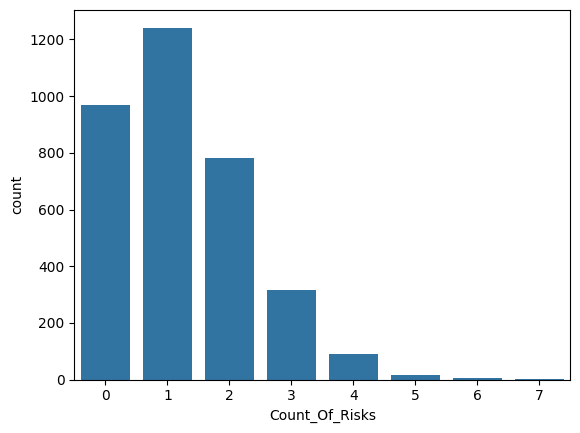

In [ ]:
g = sns.countplot(data=df, x='Count_Of_Risks')

As we can see, most people tend to have 0-2 counts of risk in total, which is good to see. It is better to see less counts of risks in comparison to the higher numbers.

In [ ]:
df['Dexa_Freq_During_Rx'].value_counts().sort_values(ascending=True)

,count
Dexa_Freq_During_Rx,
29,1
54,1
146,1
50,1
35,1
44,1
72,1
40,1
68,1


In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
outliers_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"{col}: Found {len(outliers)} outliers")


Dexa_Freq_During_Rx: Found 460 outliers
Count_Of_Risks: Found 8 outliers


In [ ]:
from scipy.stats import skew

skewness = df[numeric_cols].apply(skew).sort_values(ascending=False)

print("Skewness in Numeric Columns:")
print(skewness)

for col in skewness[skewness > 1].index:
    df[col] = np.log1p(df[col])

Skewness in Numeric Columns:
Dexa_Freq_During_Rx    6.805747
Count_Of_Risks         0.879405
dtype: float64


In [ ]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head(5))
    print("-" * 50)

for col in df.columns:
    unknown_count = (df[col] == "Unknown").sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count} 'Unknown' entries")


Ptid: 3424 unique values
Ptid
P1       1
P2275    1
P2277    1
P2278    1
P2279    1
Name: count, dtype: int64
--------------------------------------------------
Persistency_Flag: 2 unique values
Persistency_Flag
Non-Persistent    2135
Persistent        1289
Name: count, dtype: int64
--------------------------------------------------
Gender: 2 unique values
Gender
Female    3230
Male       194
Name: count, dtype: int64
--------------------------------------------------
Race: 4 unique values
Race
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: count, dtype: int64
--------------------------------------------------
Ethnicity: 3 unique values
Ethnicity
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: count, dtype: int64
--------------------------------------------------
Region: 5 unique values
Region
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name

In [ ]:
pd.set_option('display.max_rows', 1000)
df.dtypes

,0
Ptid,object
Persistency_Flag,object
Gender,object
Race,object
Ethnicity,object
Region,object
Age_Bucket,object
Ntm_Speciality,object
Ntm_Specialist_Flag,object
Ntm_Speciality_Bucket,object


<Axes: xlabel='Dexa_Freq_During_Rx', ylabel='count'>

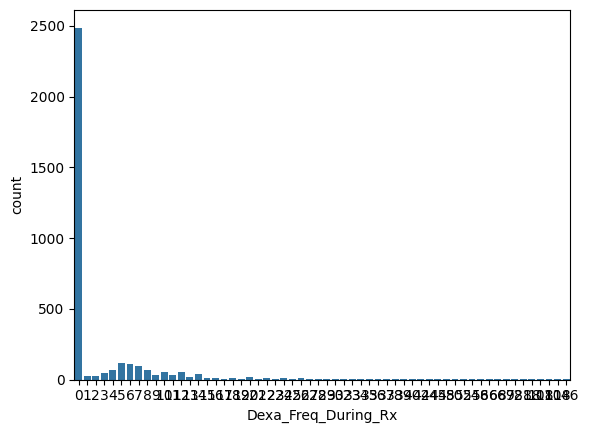

In [ ]:
g = sns.countplot(data=df,
                  x='Dexa_Freq_During_Rx')
g

<Axes: xlabel='Dexa_Freq_During_Rx', ylabel='count'>

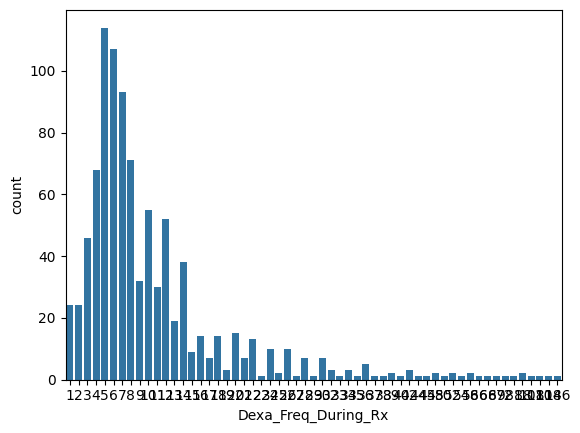

In [ ]:
g = sns.countplot(data=df[df['Dexa_Freq_During_Rx'] != 0],
                  x='Dexa_Freq_During_Rx')
g

This is what the distribution looks like without the outlier of 0

In [ ]:
df['Age_Bucket'].value_counts()

,count
Age_Bucket,
>75,1439
65-75,1086
55-65,733
<55,166


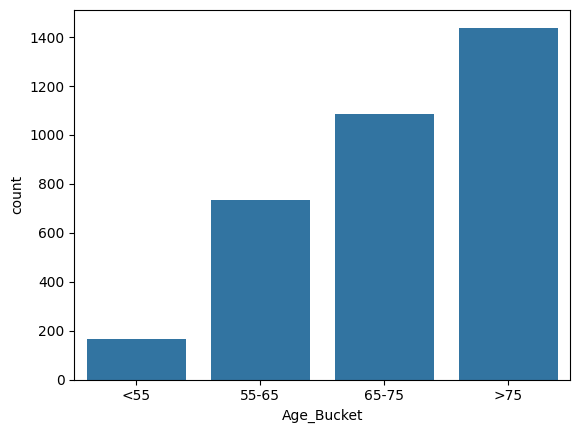

In [ ]:
g = sns.countplot(data=df,
                  x='Age_Bucket',
                  order=['<55', '55-65', '65-75', '>75']);

The largest proportion of patients reported in this dataset belongs to the older age group, specifically those aged >75.

In [ ]:
df['Ntm_Speciality_Bucket'].value_counts()

,count
Ntm_Speciality_Bucket,
OB/GYN/Others/PCP/Unknown,2104
Endo/Onc/Uro,716
Rheum,604


In [ ]:
df.rename(columns={'Ptid':'PatientID'}, inplace=True)

In [ ]:
df.Ethnicity.unique()

array(['Not Hispanic', 'Hispanic', 'Unknown'], dtype=object)

In [ ]:
df.Ethnicity.value_counts()

,count
Ethnicity,
Not Hispanic,3235
Hispanic,98
Unknown,91


In [ ]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df.Region.unique()

array(['West', 'Midwest', 'South', 'Other/Unknown', 'Northeast'],
      dtype=object)

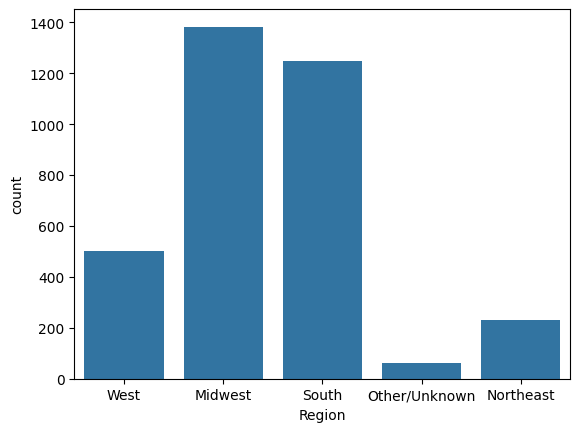

In [ ]:
g = sns.countplot(data = df,
                  x = df.Region);

Northeast and West seem to be severely underreported as compared to Midwest and South Region

In [ ]:
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.0
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.0
25%,0.000000,0.0
50%,0.000000,1.0
75%,3.000000,2.0
max,146.000000,7.0


<Axes: xlabel='Tscore_Bucket_During_Rx', ylabel='count'>

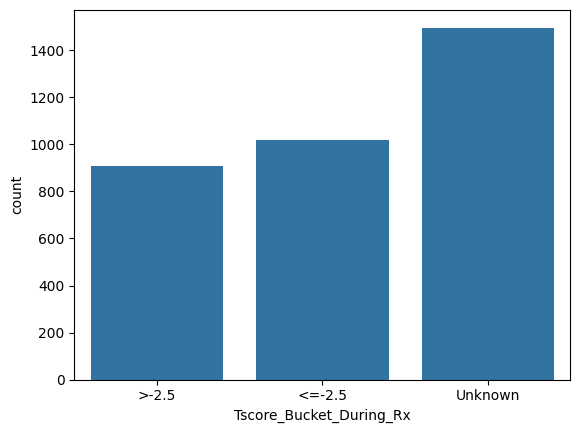

In [ ]:
g = sns.countplot(data = df,
                  x = df.Tscore_Bucket_During_Rx,
                  order=['>-2.5', '<=-2.5', 'Unknown'])
g

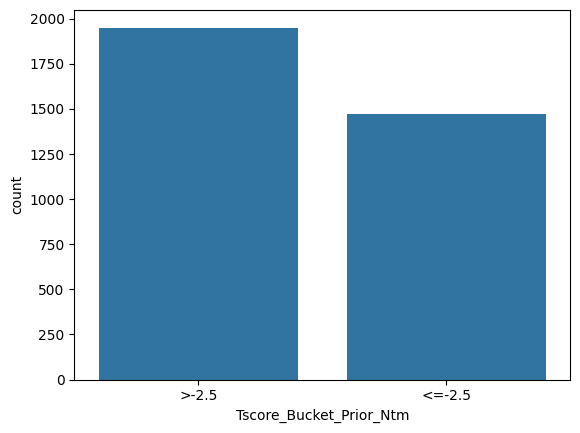

In [ ]:
g = sns.countplot(data = df,
                  x = df.Tscore_Bucket_Prior_Ntm,
                  order=['>-2.5', '<=-2.5'])
g;

In [ ]:
df.Change_T_Score.unique()

array(['No change', 'Unknown', 'Worsened', 'Improved'], dtype=object)

<Axes: xlabel='Change_T_Score', ylabel='count'>

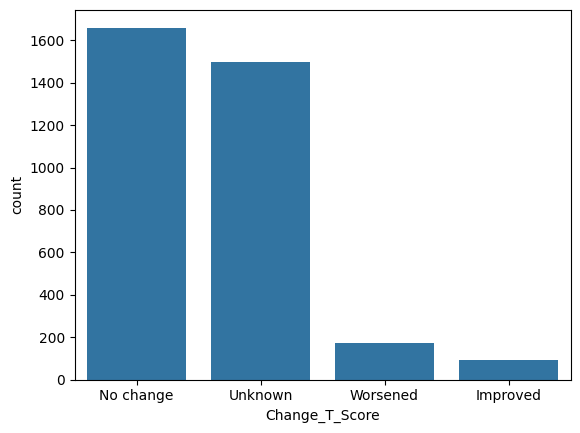

In [ ]:
g = sns.countplot(data = df,
                  x = df.Change_T_Score,
                  );
g

<Axes: xlabel='Change_Risk_Segment', ylabel='count'>

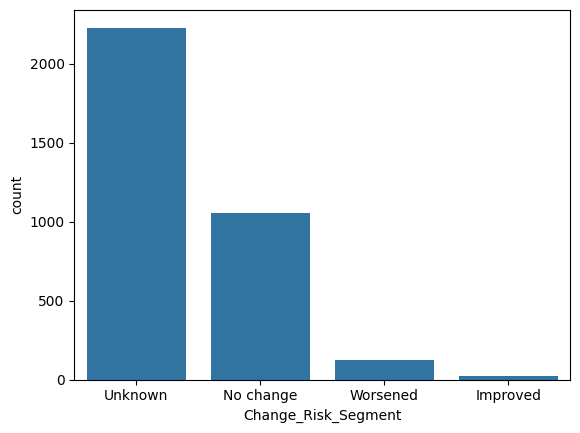

In [ ]:
g = sns.countplot(data = df,
                  x = df.Change_Risk_Segment,
                  );
g

We can see that typically there is no change. Worsened more than improved in terms of change risk segment.